In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [54]:
data = pd.read_csv('diabetes1.csv')
data = data.drop(columns='Unnamed: 0',axis=0)

In [55]:
df = data.copy(deep=True)
df.shape

(768, 9)

newdf1 = df[df['Outcome'] == 0].sample(268)
newdf2.shape

newdf2 = df[df['Outcome'] == 1 ]
newdf2.shape

df = pd.concat([newdf1, newdf2])


In [56]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [57]:
df.shape

(768, 9)

In [58]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [59]:
y = df['Outcome']
X = df.drop(columns='Outcome')

df = df[df['DiabetesPedigreeFunction'] < 1.5]

df= df[df['Insulin'] < 56]

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

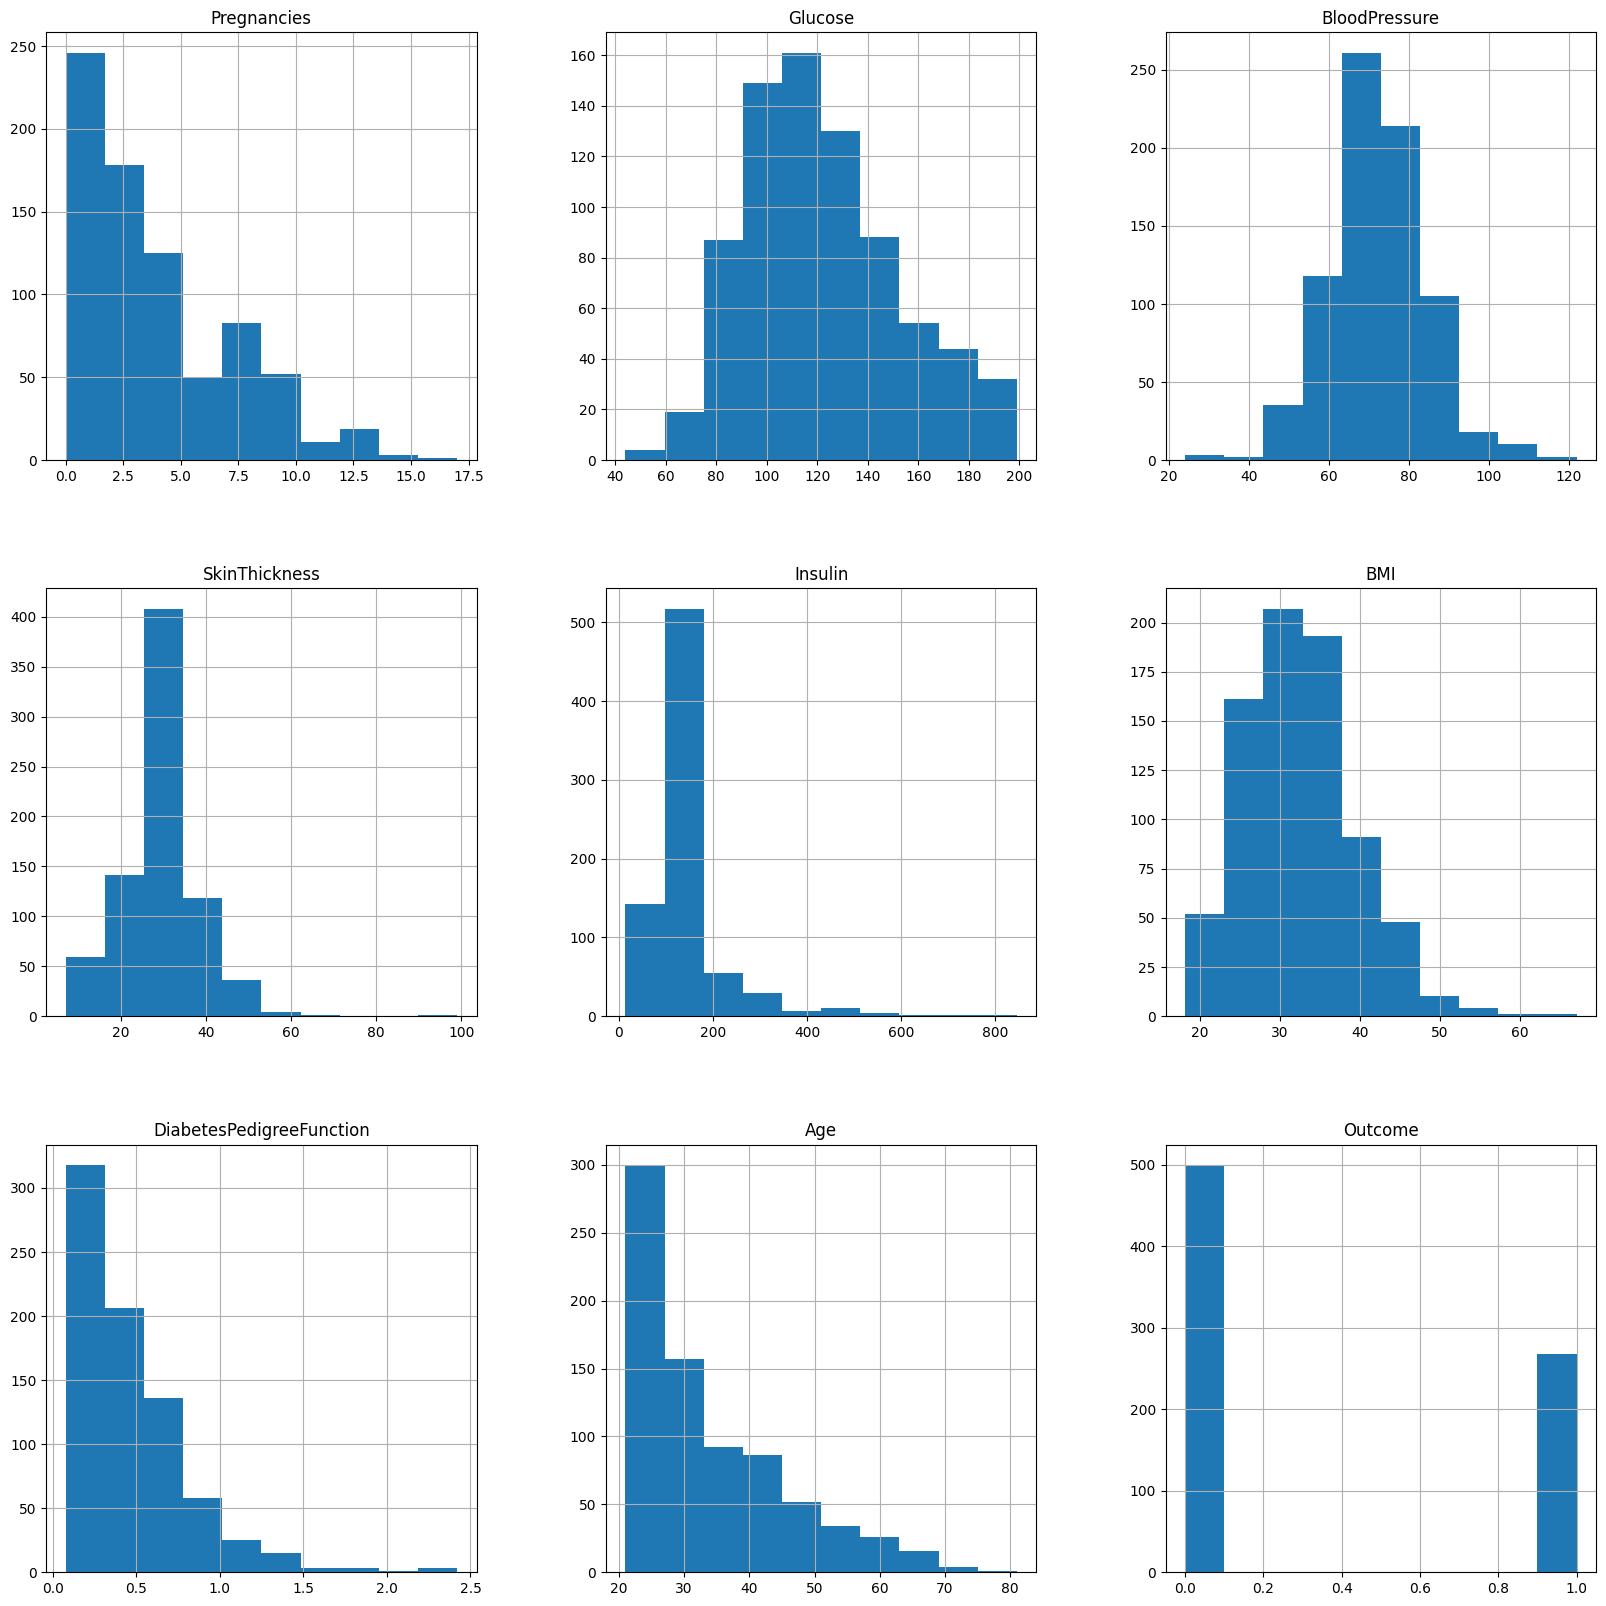

In [60]:
df.hist(figsize = (20,20))

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

In [63]:
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (614, 8)
train size y :  (614,)
test size X :  (154, 8)
test size y :  (154,)


In [64]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [65]:
y_train.value_counts(normalize=True)

Outcome
0    0.653094
1    0.346906
Name: proportion, dtype: float64

In [66]:
class_weight = {0: 1.530612244897959, 1: 2.8793103448275863}
model = LogisticRegression(class_weight=class_weight,solver='liblinear',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.530612244897959, 1: 2.8793103448275863},
                   max_iter=1000, solver='liblinear')

In [67]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, model.predict(X_test))
print("F1 score for the base model is:", f1)

F1 score for the base model is: 0.6341463414634145


In [68]:
from sklearn.model_selection import cross_val_score
k = 5  # You can choose a different number of folds
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)

Cross-validation scores: [0.74025974 0.69480519 0.76623377 0.82352941 0.77124183]
Mean Accuracy: 0.7592139886257533
Standard Deviation: 0.04204325428280857


In [69]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

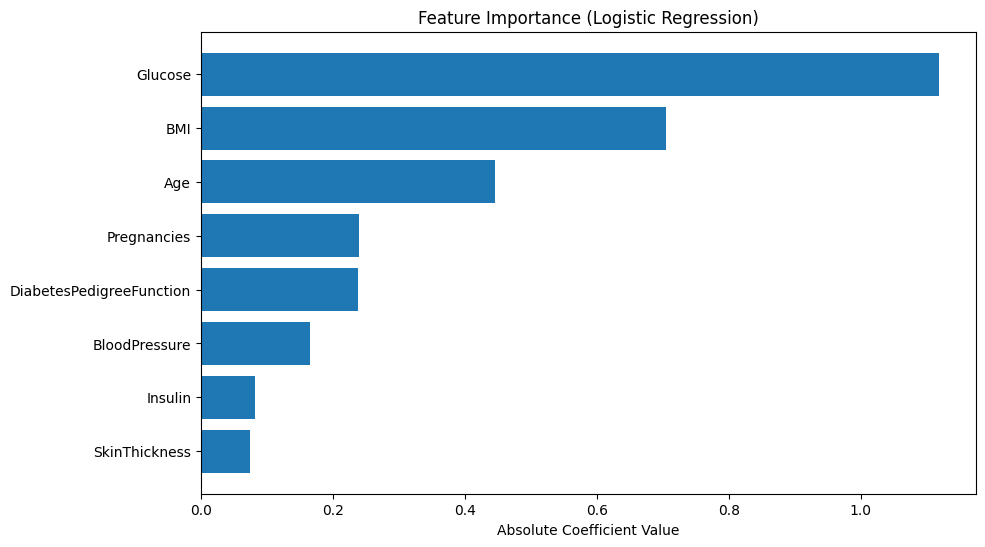

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained logistic regression model called 'model'
# and X_train contains your training feature matrix

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Calculate the absolute magnitude of coefficients
absolute_coefficients = np.abs(coefficients)

# Define feature names manually or access them from wherever you defined them
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']  # Replace with your actual feature names

# Sort feature names by absolute coefficient values (importance)
sorted_feature_names = [x for _, x in sorted(zip(absolute_coefficients, feature_names), reverse=True)]

# Sort the coefficients accordingly
sorted_coefficients = np.sort(absolute_coefficients)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

### Training with top 5 important columns

In [71]:
Z =  df[['Glucose','BMI','Age','Pregnancies','DiabetesPedigreeFunction']]
q = df['Outcome']

In [72]:
X_train,X_test,y_train,y_test = train_test_split(Z,q,random_state=42,train_size=0.8)

In [73]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [74]:
y_train.value_counts(normalize=True)

Outcome
0    0.653094
1    0.346906
Name: proportion, dtype: float64

In [75]:
class_weight = {0: 1.530612244897959, 1: 2.8793103448275863}
model = LogisticRegression(class_weight=class_weight,solver='liblinear',max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1.530612244897959, 1: 2.8793103448275863},
                   max_iter=1000, solver='liblinear')

In [76]:
from sklearn.model_selection import cross_val_score
k = 5  # You can choose a different number of folds
scores = cross_val_score(model, Z, q, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)
print("Mean Accuracy:", mean_score)
print("Standard Deviation:", std_score)

Cross-validation scores: [0.73376623 0.73376623 0.74025974 0.82352941 0.76470588]
Mean Accuracy: 0.7592055003819709
Standard Deviation: 0.034120592538532314


In [77]:
input = np.array([[20,80,56,0,0.1]]).astype(np.float64)
ypred = model.predict(input)
ypred

array([1])

import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [79]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [80]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7792207792207793


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [88]:
y_pred = rfc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


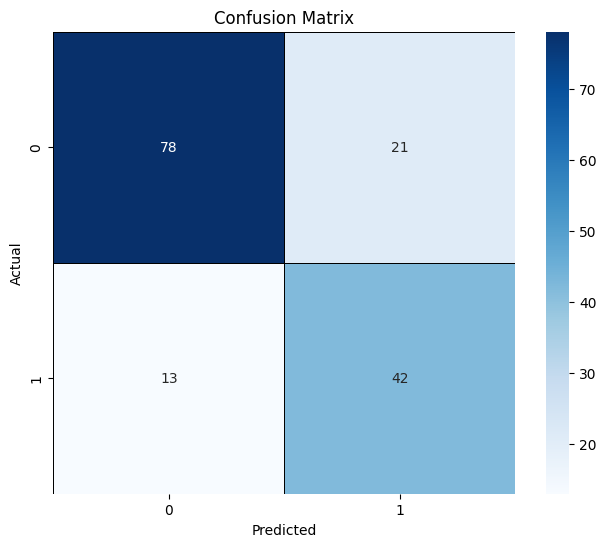

In [89]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black", square=True,
            xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


A confusion matrix typically consists of four values:

True Positives (TP): These are cases where the model correctly predicted the positive class (e.g., "1") when the actual class was positive. In other words, the model correctly identified instances of the condition you are interested in.

True Negatives (TN): These are cases where the model correctly predicted the negative class (e.g., "0") when the actual class was negative. The model correctly identified instances where the condition is not present.

False Positives (FP): These are cases where the model incorrectly predicted the positive class when the actual class was negative. Also known as a Type I error or a false alarm.

False Negatives (FN): These are cases where the model incorrectly predicted the negative class when the actual class was positive. Also known as a Type II error or a missed opportunity.

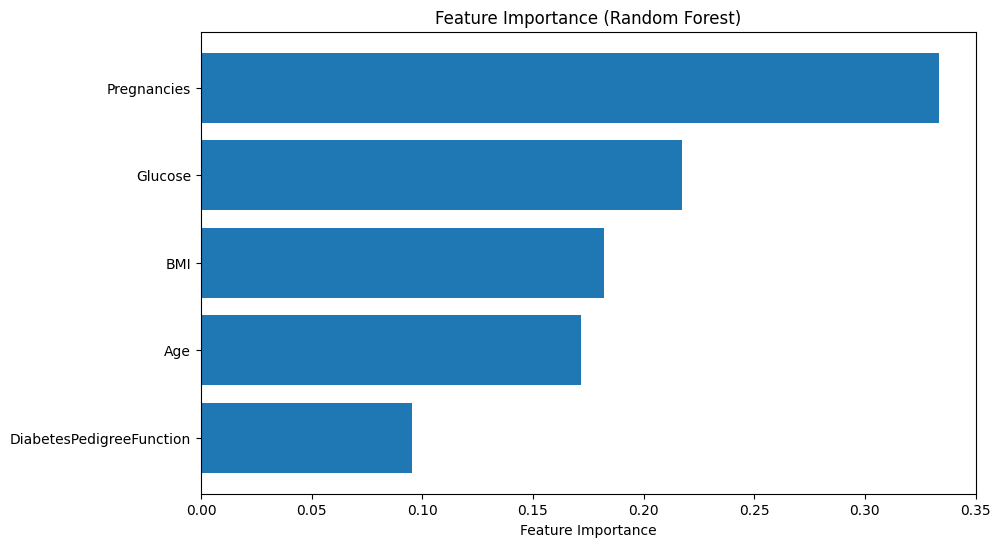

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained Random Forest model called 'rf_model'
# and X_train contains your training feature matrix

# Get feature importances from the Random Forest model
importances = rfc.feature_importances_

# Define feature names manually or access them from wherever you defined them
feature_names = ['Pregnancies', 'Glucose','BMI', 'DiabetesPedigreeFunction', 'Age']  # Replace with your actual feature names

# Sort feature names by importance
sorted_feature_names = [x for _, x in sorted(zip(importances, feature_names), reverse=True)]

# Sort the importances accordingly
sorted_importances = np.sort(importances)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()
